In [1]:
%matplotlib inline

In [2]:
from astropy.table import Table
from astropy.cosmology import Planck15

tng = Table.read('/Users/aphearin/work/random/1001/moster_sfh_fitter/tmp.h5', path='data')

fn = "/Users/aphearin/work/DATA/MOCKS/TNG/data_fits_for_andrew/tng/tn_cosmic_time.npy"
ntimes = tng['log_mah_sm'].shape[1]
tng_t = np.load(fn)[100-ntimes:]
lgt = np.log10(tng_t)
print(tng.keys())

_ztable = np.linspace(15, 0, 500)
_ttable = Planck15.age(_ztable).value
tng_z = np.interp(tng_t, _ttable, _ztable)

['log_mah_dm', 'log_mah_sm', 'log_mah_gm', 'log_mah_tot', 'tpeak_dm', 'tpeak_sm', 'tpeak_bm', 'sfrh', 'baryon_mass_frac', 'frac_gas', 'original_order', 'tmp', 'logmp', 'dmhdt_x0', 'dmhdt_k', 'dmhdt_early_index', 'dmhdt_late_index', 'sfr_eff_m_0', 'sfr_eff_m_z', 'sfr_eff_beta_0', 'sfr_eff_beta_z', 'sfr_eff_gamma_0', 'sfr_eff_lgeps_n0', 'sfr_eff_lgeps_nz', 'qtime', 'qseverity', 'loss', 'log_ssfr_target', 'log_smh_target', 'log_sfr_target', 'dm_tot_dt_target', 'dmg_dt_target', 'log_mah_fit', 'log_dmhdt_fit', 'log_smh_fit', 'log_ssfr_fit', 'log_sfr_fit', 'log_sfr_fit_noq', 'log_smh_fit_noq', 'fstar_fit', 'fstar_target', 'epsilon_target', 'epsilon_dm_target', 'epsilon_dm_fit', 'epsilon_fbtrue_fit', 'epsilon_ms_dm_fit', 'epsilon_ms_fbtrue_fit', 'dlogsm_quenching']


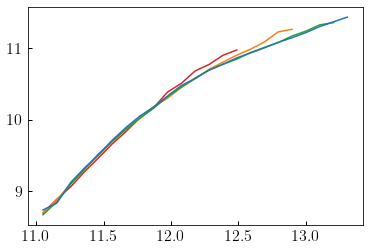

In [3]:
from scipy.stats import binned_statistic
logmp_bins = np.linspace(11, 15, 40)
logmp_binmids = 0.5*(logmp_bins[:-1] + logmp_bins[1:])

from astropy.cosmology import Planck15
ttest = Planck15.age((4, 2, 1, 0.5, 0)).value
itest = tng_z.size - 1 - np.searchsorted(tng_z[::-1], (4, 2, 1, 0.5, 0))

res = np.zeros((logmp_binmids.size, ttest.size))
for i, it in enumerate(itest):
    msk = tng['log_mah_sm'][:, it] > 0

    mean_mstar, __, __ = binned_statistic(
        tng['log_mah_tot'][:, it], 10**tng['log_mah_sm'][:, it], bins=logmp_bins)
    res[:, i] = np.log10(mean_mstar)

fig, ax = plt.subplots(1, 1)

__=ax.plot(logmp_binmids, res[:, 0], color=mred)
__=ax.plot(logmp_binmids, res[:, 1], color=morange)
__=ax.plot(logmp_binmids, res[:, 2], color=mgreen)
__=ax.plot(logmp_binmids, res[:, 3], color=mblue)

In [10]:
mpat = "tng_logmp_z{0:.1f}.dat"
smpat = "tng_logsm_z{0:.1f}.dat"

for i, it in enumerate(itest):
    zt = tng_z[it]
    msk = np.isfinite(res[:, i])
    msave = logmp_binmids[msk]
    smsave = res[:, i][msk]
    np.savetxt(mpat.format(zt), msave)
    np.savetxt(smpat.format(zt), smsave)
